BY: https://github.com/AssanaliAbu/Hand-Gesture-Recognition

In [36]:
import csv

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [37]:
# Specify data paths
dataset = 'labels.csv'
model_save_path = 'gesture_detection_model.hdf5'

# Set number of classes

In [38]:
# Change training classes if necessary
NUM_CLASSES = 2

# Dataset reading

In [59]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 3) + 1)))

In [60]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

(array([0, 1], dtype=int32), array([2000, 2006]))


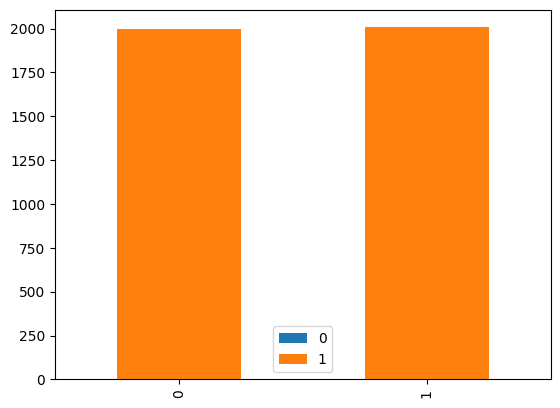

In [62]:
# Classes count
counts = np.unique(y_dataset, return_counts=True)
df = pd.DataFrame(counts)
df.T.plot(kind="bar", stacked=True)
print(counts)

# Model building

In [63]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(63),
    tf.keras.layers.Dropout(0.0),
    # tf.keras.layers.Dense(32, activation='relu'),
    # tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [64]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_13 (Dropout)        (None, 63)                0         
                                                                 
 dense_18 (Dense)            (None, 32)                2048      
                                                                 
 dropout_14 (Dropout)        (None, 32)                0         
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 2)                 34        
                                                                 
Total params: 2,610
Trainable params: 2,610
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False, save_best_only=True)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=50, verbose=1)

In [66]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [67]:
model.fit(
    X_train,
    y_train,
    epochs=40,
    batch_size=43,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/40
 1/70 [..............................] - ETA: 10s - loss: 0.9143 - accuracy: 0.4651
Epoch 1: val_loss improved from inf to 0.33887, saving model to gesture_detection_model.hdf5
70/70 [==============================] - 0s 2ms/step - loss: 0.5463 - accuracy: 0.8678 - val_loss: 0.3389 - val_accuracy: 0.9990
Epoch 2/40
 1/70 [..............................] - ETA: 0s - loss: 0.3414 - accuracy: 1.0000
Epoch 2: val_loss improved from 0.33887 to 0.08526, saving model to gesture_detection_model.hdf5
70/70 [==============================] - 0s 1ms/step - loss: 0.1898 - accuracy: 0.9983 - val_loss: 0.0853 - val_accuracy: 1.0000
Epoch 3/40
 1/70 [..............................] - ETA: 0s - loss: 0.0964 - accuracy: 1.0000
Epoch 3: val_loss improved from 0.08526 to 0.02827, saving model to gesture_detection_model.hdf5
70/70 [==============================] - 0s 1ms/step - loss: 0.0526 - accuracy: 1.0000 - val_loss: 0.0283 - val_accuracy: 1.0000
Epoch 4/40
67/70 [=========================

In [34]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [35]:
# Model evaluation
# TODO Test on loaded model
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=64)

16/16 [==============================] - 0s 488us/step - loss: 5.7846e-05 - accuracy: 1.0000


In [15]:
import tensorflow 
from tensorflow.keras.models import load_model

In [16]:
model = load_model(model_save_path)

# Confusion matrix

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

ModuleNotFoundError: No module named 'seaborn'